In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import glob
import cv2

from keras.models import Model, Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.preprocessing.image import array_to_img, img_to_array, load_img 
import os
import seaborn as sns
from keras.applications.densenet import DenseNet201

In [2]:
# Read input images and assign labels based on folder names
print(os.listdir("../input/coviddataset/Data/"))

SIZE = 128  #Resize images

['test', 'train']


In [3]:
#Capture training data and labels into respective lists
train_images = []
train_labels = [] 

for directory_path in glob.glob("../input/coviddataset/Data/train/*"):
    print(repr(directory_path))
    label = directory_path.split("/")[-1]
    print(label)
    for img_path in glob.glob(os.path.join(directory_path, "*.jpg")):
        print(img_path)
#         img = cv2.imread(img_path, cv2.IMREAD_COLOR)       
#         img = cv2.resize(img, (SIZE, SIZE))
#         img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        img = img_to_array(load_img(img_path, target_size = (SIZE,SIZE))) 
        train_images.append(img)
        train_labels.append(label)

#Convert lists to arrays        
train_images = np.array(train_images)
train_labels = np.array(train_labels)
print(train_labels)

'../input/coviddataset/Data/train/PNEUMONIA'
PNEUMONIA
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(3189).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(3607).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(2169).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(969).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(704).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(1952).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(2307).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(2890).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(2601).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(3961).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(1266).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(1961).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(3958).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(2693).jpg
../input/coviddataset/Data/train/PNEUMONIA/PNEUMONIA(1237).jpg
..

In [4]:
# Capture test/validation data and labels into respective lists

test_images = []
test_labels = [] 
for directory_path in glob.glob("../input/coviddataset/Data/test/*"):
    fruit_label = directory_path.split("/")[-1]
    for img_path in glob.glob(os.path.join(directory_path, "*.jpg")):
#         img = cv2.imread(img_path, cv2.IMREAD_COLOR)
#         img = cv2.resize(img, (SIZE, SIZE))
#         img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        img = img_to_array(load_img(img_path, target_size = (SIZE,SIZE)))
        test_images.append(img)
        test_labels.append(fruit_label)

#Convert lists to arrays                
test_images = np.array(test_images)
test_labels = np.array(test_labels)
print(test_labels)

['PNEUMONIA' 'PNEUMONIA' 'PNEUMONIA' ... 'COVID19' 'COVID19' 'COVID19']


In [5]:
#Encode labels from text to integers.
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(test_labels)
test_labels_encoded = le.transform(test_labels)
print(test_labels_encoded)
le.fit(train_labels)
train_labels_encoded = le.transform(train_labels)
print(train_labels_encoded)

[2 2 2 ... 0 0 0]
[2 2 2 ... 0 0 0]


In [6]:
from sklearn.model_selection import train_test_split

x_train, vx_test, y_train, vy_test = train_test_split(train_images, train_labels_encoded, test_size=0.20)

In [7]:
#Split data into test and train datasets (already split but assigning to meaningful convention)
x_test, y_test = test_images, test_labels_encoded

In [8]:
# Normalize pixel values to between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

#One hot encode y values for neural network. 
from keras.utils import to_categorical
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)
vy_test_one_hot = to_categorical(vy_test)


In [9]:
import keras
from keras.layers import *
# CNN Based Model in Keras

model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(128,128,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3,activation='sigmoid'))

model.compile(loss=keras.losses.categorical_crossentropy,optimizer='adam',metrics=['accuracy'])

In [10]:
# model = Sequential()

# model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128,128,3)))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))

# model.add(Conv2D(64, (3, 3), activation='relu'))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))

# model.add(Conv2D(128, (3, 3), activation='relu'))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))

# model.add(Flatten())
# model.add(Dense(512, activation='relu'))
# model.add(BatchNormalization())
# model.add(Dropout(0.5))
# model.add(Dense(3, activation='sigmoid'))

# model.compile(loss=keras.losses.categorical_crossentropy, optimizer='adam', metrics=['accuracy'])


In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 124, 124, 64)      18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 62, 62, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 62, 62, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 60, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 30, 30, 64)        0

In [12]:
import tensorflow as tf

In [13]:
checkpoint_path = 'training1/cp-{epoch:04d}.ckpt'
checkpoint_dir = os.path.dirname(checkpoint_path)

# create checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,
                                                save_weights_only=True,
                                                verbose=1,
                                                period=10)

In [14]:
# model.fit(x_train,y_train_one_hot,epochs=10,batch_size=32)

In [15]:
# last_checkpoint_path='../input/50epochcp/50-epoch-IT-true/cp-0050.ckpt'

In [16]:
# model.load_weights(last_checkpoint_path)

In [17]:
history = model.fit(x_train,y_train_one_hot,epochs=150,batch_size=32,validation_data=(vx_test,vy_test_one_hot),callbacks=[cp_callback])

Epoch 1/150
300/300 [==============================] - 12s 28ms/step - loss: 0.8237 - accuracy: 0.5910 - val_loss: 53.8154 - val_accuracy: 0.8317
Epoch 2/150
300/300 [==============================] - 8s 25ms/step - loss: 0.2648 - accuracy: 0.9115 - val_loss: 24.5502 - val_accuracy: 0.9458
Epoch 3/150
300/300 [==============================] - 7s 25ms/step - loss: 0.2125 - accuracy: 0.9306 - val_loss: 23.6823 - val_accuracy: 0.9429
Epoch 4/150
300/300 [==============================] - 7s 25ms/step - loss: 0.1680 - accuracy: 0.9395 - val_loss: 21.5270 - val_accuracy: 0.9362
Epoch 5/150
300/300 [==============================] - 8s 25ms/step - loss: 0.1443 - accuracy: 0.9483 - val_loss: 26.6899 - val_accuracy: 0.9558
Epoch 6/150
300/300 [==============================] - 7s 25ms/step - loss: 0.1194 - accuracy: 0.9551 - val_loss: 27.5257 - val_accuracy: 0.9475
Epoch 7/150
300/300 [==============================] - 7s 25ms/step - loss: 0.1087 - accuracy: 0.9583 - val_loss: 39.0625 - val_a

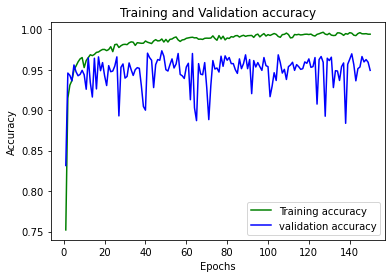

In [18]:
loss_train = history.history['accuracy']
loss_val = history.history['val_accuracy']
epochs = range(1,151)
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

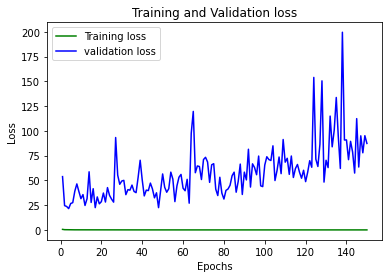

In [19]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,151)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [20]:
model.evaluate(x_test,y_test_one_hot)

41/41 [==============================] - 1s 10ms/step - loss: 0.4408 - accuracy: 0.9480


[0.44082584977149963, 0.9479813575744629]

In [21]:
# Class Activation Maps
# Grad-CAM 

In [22]:
from keras.models import *

model.save('COVID19-CNN-WithGAN.hd5')

TrainedModel = load_model('COVID19-CNN-WithGAN.hd5')

TrainedModel.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 124, 124, 64)      18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 62, 62, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 62, 62, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 60, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 30, 30, 64)        0

In [23]:
import sklearn.metrics as metrics

y_pred = TrainedModel.predict(x_test)  # shape=(n_samples, 12)
y_pred_labels = np.argmax(y_pred, axis=1)  # only necessary if output has one-hot-encoding, shape=(n_samples)

confusion_matrix = metrics.confusion_matrix(y_true=y_test, y_pred=y_pred_labels)

<AxesSubplot:>

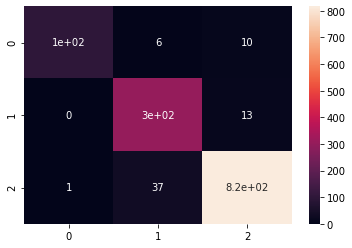

In [24]:
#Confusion Matrix - verify accuracy of each class
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,y_pred_labels )
#print(cm)
sns.heatmap(cm, annot=True)

In [25]:
FP = cm.sum(axis=0) - np.diag(cm) 
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)
FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)
# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
print("Sensitivity:",TPR)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
print("Specificity:",TNR)
# Precision or positive predictive value
PPV = TP/(TP+FP)
print("Precision:",PPV)
# Negative predictive value
NPV = TN/(TN+FN)
print(NPV)
# Fall out or false positive rate
FPR = FP/(FP+TN)
print(FPR)
# False negative rate
FNR = FN/(TP+FN)
print(FNR)
# False discovery rate
FDR = FP/(TP+FP)
print(FDR)
# Overall accuracy for each class
ACC = (TP+TN)/(TP+FP+FN+TN)
print(ACC)

Sensitivity: [0.86206897 0.95899054 0.95555556]
Specificity: [0.99914676 0.95571576 0.94688222]
Precision: [0.99009901 0.87608069 0.97261905]
[0.98652064 0.98618491 0.91517857]
[0.00085324 0.04428424 0.05311778]
[0.13793103 0.04100946 0.04444444]
[0.00990099 0.12391931 0.02738095]
[0.98680124 0.95652174 0.95263975]


The prediction for this image is:  ['NORMAL']
The actual label for this image is:  NORMAL


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


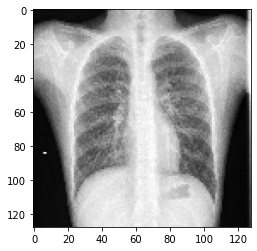

In [26]:
#Check results on a few select images
n=np.random.randint(0, x_test.shape[0])
img = x_test[n]
plt.imshow(img)
input_img = np.expand_dims(img, axis=0) #Expand dims so the input is (num images, x, y, c)
prediction = TrainedModel.predict(input_img)
y_pred_label = np.argmax(prediction, axis=1) 
y_pred_label = le.inverse_transform([y_pred_label])  #Reverse the label encoder to original name
print("The prediction for this image is: ", y_pred_label)
print("The actual label for this image is: ", test_labels[n])
